<a href="https://colab.research.google.com/github/stevenbongo/AI-vision/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류(Classification)
## 붓꽃(Iris) 품종 분류

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### skleran 데이터셋에서 iris 데이터셋 로딩

In [ ]:
iris = datasets.load_iris()

###  iris 데이터셋의 key 값 확인

In [ ]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


### 데이터셋 Description 확인

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Train Test 데이터셋 분할

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], 
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    stratify=iris.target, 
                                                    random_state=42)

### 로지스틱 회귀

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 학습
lr = LogisticRegression()
lr.fit(X_train, y_train)

# 예측
pred = lr.predict(X_test)
print(f'예측값: {pred[:10]}')

# 성능 평가
accuracy = accuracy_score(y_test, pred) 
print(f'Mean accuracy score: {accuracy:.4}')

# 확률값
prob = lr.predict_proba(X_test)
print(f'Probability: {prob[0]}')

예측값: [2 1 1 1 2 2 1 1 0 2]
Mean accuracy score: 0.9333
Probability: [1.94606530e-06 3.22459680e-02 9.67752086e-01]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### KNN(K-Nearest Neighbor, K-최근접 이웃)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 모델 학습
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# 예측
pred = knn.predict(X_test)
print(f'예측값: {pred[:10]}')

# 성능 평가
accuracy = accuracy_score(y_test, pred) 
print(f'Mean accuracy score: {accuracy:.4}')

예측값: [2 1 2 1 2 2 1 1 0 2]
Mean accuracy score: 0.9556


### 의사결정트리(Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
# 예측
pred = dtc.predict(X_test)
print(f'예측값: {pred[:10]}')

예측값: [2 1 2 1 2 2 1 1 0 2]


In [ ]:
# 성능 평가
accuracy = accuracy_score(y_test, pred) 
print(f'Mean accuracy score: {accuracy:.4}')

Mean accuracy score: 0.9778


In [ ]:
# 확률값
prob = dtc.predict_proba(X_test)
print(f'Probability: {prob[0]}')

Probability: [0.         0.02941176 0.97058824]


#### 훈련된 의사결정트리 시각화

In [ ]:
!pip install graphviz

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
        dtc,
        out_file="iris_tree.dot",
        feature_names=iris['feature_names'],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

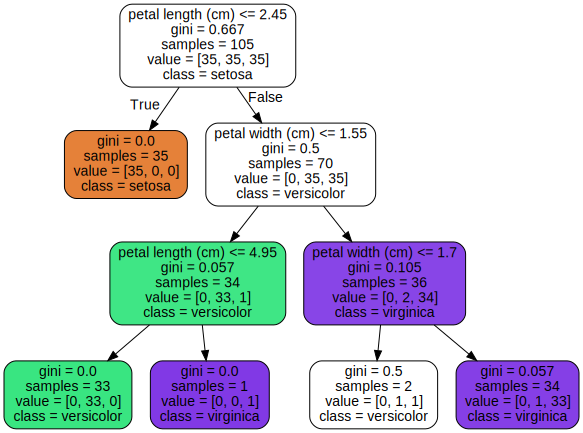

In [ ]:
import graphviz

with open("iris_tree.dot") as f:
    dot_graph = f.read()
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='iris_tree', directory='./', cleanup=True)
dot

### 서포트 벡터 머신(SVM)

In [ ]:
from sklearn.svm import SVC

# 모델 학습
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

# 예측
pred = svc.predict(X_test)
print(f'예측값: {pred[:10]}')

# 성능 평가
accuracy = accuracy_score(y_test, pred) 
print(f'Mean accuracy score: {accuracy:.4}')

예측값: [2 1 2 1 2 2 1 1 0 2]
Mean accuracy score: 0.9556


# 앙상블 모델

### 보팅(Voting)

In [ ]:
from sklearn.ensemble import VotingClassifier

# 모델 학습
hvc = VotingClassifier(estimators=[('KNN', knn), ('DT', dtc), ('SVM', svc)], 
                       voting='hard')
hvc.fit(X_train, y_train)

# 예측
pred = hvc.predict(X_test)
print('예측값: ', pred[:10])

# 모델 성능 평가
accuracy = accuracy_score(y_test, pred) 
print(f'Mean accuracy score: {accuracy:.4}')

예측값:  [2 1 2 1 2 2 1 1 0 2]
Mean accuracy score: 0.9556


### 랜덤포레스트(Random Forest, 배깅)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
rfc = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)
rfc.fit(X_train, y_train)

# 예측
pred = rfc.predict(X_test)
print('예측값: ', pred[:10])

# 모델 성능 평가
accuracy = accuracy_score(y_test, pred)
print("Accuracy: {:.4f}".format(accuracy))

예측값:  [2 1 1 1 2 2 1 1 0 2]
Accuracy: 0.8889


### XGBoost(Extreme Gradient Boosting,부스팅)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# 모델 학습 
xgbc = XGBClassifier(n_estimators=50, max_depth=3, random_state=42)
xgbc.fit(X_train, y_train)

# 예측
pred = xgbc.predict(X_test)
print('예측값: ', pred[:10])

# 모델 성능 평가
accuracy = accuracy_score(y_test, pred) 
print(f'Mean accuracy score: {accuracy:.4}')

예측값:  [2 1 2 1 2 2 1 1 0 2]
Mean accuracy score: 0.9333


### Light GBM(Gradient Boosting Machine,부스팅)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix 

# 모델 학습 
lgbc = LGBMClassifier(n_estimators=50, max_depth=3, random_state=42)
lgbc.fit(X_train, y_train)

# 예측
y_pred = lgbc.predict(X_test)
print('예측값: ', pred[:10])

# 모델 성능 평가
accuracy = accuracy_score(y_test, pred) 
print(f'Mean accuracy score: {accuracy:.4}')
print(confusion_matrix(y_test, y_pred))

예측값:  [2 1 2 1 2 2 1 1 0 2]
Mean accuracy score: 0.9333
[[15  0  0]
 [ 0 14  1]
 [ 0  5 10]]
